In [1]:
import pandas as pd
import numpy as np

#Project Members: Bekir Emrehan Şimşek 202011039, Bilgesu Fındık 202011407, Melike Hazal Özcan 202011013

# DATA CLEANING

In [2]:
data = pd.read_csv("Billionaires Statistics Dataset.csv")
data

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2540,1000,Healthcare,Yu Rong,51.0,China,Shanghai,Health clinics,Healthcare,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2636,2540,1000,Food & Beverage,"Richard Yuengling, Jr.",80.0,United States,Pottsville,Beer,Food & Beverage,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2637,2540,1000,Manufacturing,Zhang Gongyun,60.0,China,Gaomi,Tyre manufacturing machinery,Manufacturing,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2638,2540,1000,Real Estate,Zhang Guiping & family,71.0,China,Nanjing,Real estate,Real Estate,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397


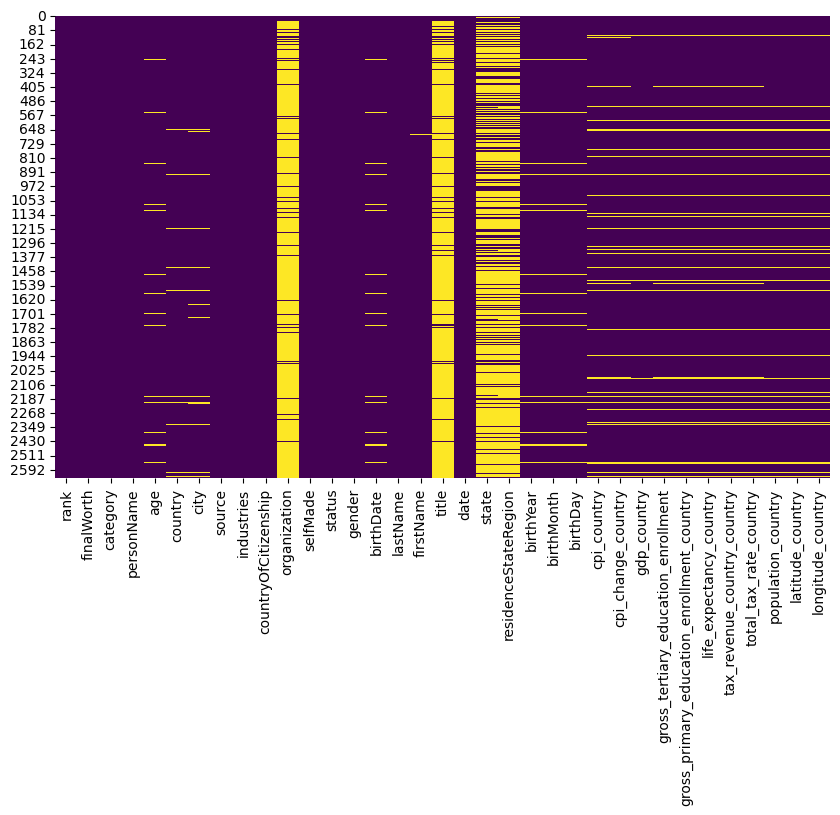

In [3]:
#kaggle
import matplotlib.pyplot as plt
import seaborn as sns
missing_values = data.isnull().sum()
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.show()

In [4]:
data.isna().sum()

rank                                             0
finalWorth                                       0
category                                         0
personName                                       0
age                                             65
country                                         38
city                                            72
source                                           0
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMade                                         0
status                                           0
gender                                           0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                                             0
state                          

In [5]:
def explore_relationship(column):
    # Filter the data to only include rows where country is not null
    non_missing_data = data[data['country'].notnull()]

    # Group by the specified column and 'country', and count the number of occurrences
    relationship = non_missing_data.groupby([column, 'country']).size().reset_index(name='count')

    return relationship

# relationship for 'city' and 'countryOfCitizenship'
relationship_city = explore_relationship('city')
relationship_country_citizenship = explore_relationship('countryOfCitizenship')

relationship_city.head(), relationship_country_citizenship.head()

(        city         country  count
 0   A Coruña           Spain      1
 1     Aarhus         Denmark      1
 2  Abbeville   United States      1
 3   Aberdeen  United Kingdom      1
 4   Aberdyfi  United Kingdom      1,
   countryOfCitizenship    country  count
 0              Algeria    Algeria      1
 1            Argentina  Argentina      4
 2            Argentina    Uruguay      1
 3              Armenia    Armenia      1
 4            Australia  Australia     40)

In [6]:
# Finding the most common 'country' for each 'countryOfCitizenship'
most_common_country = relationship_country_citizenship.sort_values(by=['countryOfCitizenship', 'count'], ascending=[True, False])
most_common_country = most_common_country.drop_duplicates(subset=['countryOfCitizenship'], keep='first')

# Creating a dictionary to map 'countryOfCitizenship' to the most common 'country'
country_mapping = dict(zip(most_common_country['countryOfCitizenship'], most_common_country['country']))

# Filling the missing values in 'country' using the mapping
data['country_filled'] = data['country'].fillna(data['countryOfCitizenship'].map(country_mapping))

# Checking if there are any missing values left in the new 'country_filled' column
missing_after_filling = data['country_filled'].isnull().sum()

missing_after_filling

1

In [7]:
data['country_filled'].fillna("Unknown",inplace=True)

In [8]:
del data['city']
del data['state']
del data['residenceStateRegion']
del data['lastName']
del data['firstName']
del data['birthMonth']
del data['birthDay']
del data['birthDate']
del data['birthYear']
del data['latitude_country']
del data['longitude_country']
del data['gross_tertiary_education_enrollment']
del data['gross_primary_education_enrollment_country']
del data['country']
del data['countryOfCitizenship']
del data['date']

In [9]:
same_values_check = (data['industries'] == data['category']).all()
same_values_check

True

In [10]:
del data['category']

In [11]:
data['organization'].fillna('Unknown',inplace = True)
data.isna().sum()

rank                              0
finalWorth                        0
personName                        0
age                              65
source                            0
industries                        0
organization                      0
selfMade                          0
status                            0
gender                            0
title                          2301
cpi_country                     184
cpi_change_country              184
gdp_country                     164
life_expectancy_country         182
tax_revenue_country_country     183
total_tax_rate_country          182
population_country              164
country_filled                    0
dtype: int64

In [12]:
data['age'].mean()

65.14019417475728

In [13]:
data['age'].fillna(data['age'].mean(), inplace = True)
data.isna().sum()

rank                              0
finalWorth                        0
personName                        0
age                               0
source                            0
industries                        0
organization                      0
selfMade                          0
status                            0
gender                            0
title                          2301
cpi_country                     184
cpi_change_country              184
gdp_country                     164
life_expectancy_country         182
tax_revenue_country_country     183
total_tax_rate_country          182
population_country              164
country_filled                    0
dtype: int64

In [14]:
data['title'].fillna('Unknown',inplace = True)

In [15]:
data['cpi_country'].mean()

127.75520358305991

In [16]:
data['cpi_country'].fillna(data['cpi_country'].mean(),inplace = True)

In [17]:
data['population_country'].mean()

510205317.8392569

In [18]:
data['population_country'].fillna(data['population_country'].mean(),inplace = True)

In [19]:
data['life_expectancy_country'].median()

78.5

In [20]:
data['life_expectancy_country'].fillna(data['life_expectancy_country'].median(),inplace = True)

In [21]:
data['cpi_change_country'].std()

3.62376332753494

In [22]:
data['cpi_change_country'].fillna(data['cpi_change_country'].std(),inplace = True)

In [23]:
data.isna().sum()

rank                             0
finalWorth                       0
personName                       0
age                              0
source                           0
industries                       0
organization                     0
selfMade                         0
status                           0
gender                           0
title                            0
cpi_country                      0
cpi_change_country               0
gdp_country                    164
life_expectancy_country          0
tax_revenue_country_country    183
total_tax_rate_country         182
population_country               0
country_filled                   0
dtype: int64

In [24]:
mean_tax_revenue_by_country = data.groupby('country_filled')['tax_revenue_country_country'].mean()

#Replacing missing values
data['tax_revenue_country_country_filled'] = data.apply(
    lambda row: #Check every row
        mean_tax_revenue_by_country[row['country_filled']] 
            if pd.isnull(row['tax_revenue_country_country']) #If it is null then fill with mean
            else row['tax_revenue_country_country'],axis=1) #it is already full so leave like that 

# Check
filled_tax_revenue_missing_count = data['tax_revenue_country_country_filled'].isnull().sum()
filled_tax_revenue_missing_count

149

In [25]:
# Calculating number of data in each row at tax_revenue_country_country
country_tax_data_counts = data.groupby('country_filled')['tax_revenue_country_country_filled'].count()

#Check missing tax with using country name then write at list 
countries_with_no_tax_data = country_tax_data_counts[country_tax_data_counts == 0].index.tolist()

countries_with_no_tax_data

['Andorra',
 'Bahamas',
 'Bermuda',
 'British Virgin Islands',
 'Cayman Islands',
 'Eswatini (Swaziland)',
 'Guernsey',
 'Hong Kong',
 'Ireland',
 'Liechtenstein',
 'Monaco',
 'Taiwan',
 'Turks and Caicos Islands',
 'Unknown']

In [26]:
data['tax_revenue_country_country_filled'].mean()

12.579566439181171

In [27]:
data['tax_revenue_country_country_filled'].fillna(data['tax_revenue_country_country_filled'].mean(),inplace = True)

In [28]:
del data['tax_revenue_country_country']

In [29]:
data.isna().sum()

rank                                    0
finalWorth                              0
personName                              0
age                                     0
source                                  0
industries                              0
organization                            0
selfMade                                0
status                                  0
gender                                  0
title                                   0
cpi_country                             0
cpi_change_country                      0
gdp_country                           164
life_expectancy_country                 0
total_tax_rate_country                182
population_country                      0
country_filled                          0
tax_revenue_country_country_filled      0
dtype: int64

In [30]:
mean_tax_revenue_by_country = data.groupby('country_filled')['total_tax_rate_country'].mean()

data['total_tax_rate_country_filled'] = data.apply(
    lambda row: 
        mean_tax_revenue_by_country[row['country_filled']] 
            if pd.isnull(row['total_tax_rate_country']) 
            else row['total_tax_rate_country'], axis=1)

filled_tax_revenue_missing_count = data['total_tax_rate_country_filled'].isnull().sum()
filled_tax_revenue_missing_count

148

In [31]:
data['total_tax_rate_country_filled'].mean()

43.98254414125185

In [32]:
data['total_tax_rate_country_filled'].fillna(data['total_tax_rate_country_filled'].mean(),inplace = True)

In [33]:
del data['total_tax_rate_country']

In [34]:
data.isna().sum()

rank                                    0
finalWorth                              0
personName                              0
age                                     0
source                                  0
industries                              0
organization                            0
selfMade                                0
status                                  0
gender                                  0
title                                   0
cpi_country                             0
cpi_change_country                      0
gdp_country                           164
life_expectancy_country                 0
population_country                      0
country_filled                          0
tax_revenue_country_country_filled      0
total_tax_rate_country_filled           0
dtype: int64

In [35]:
import re
def clean_and_convert_gdp(value):
    
    if not isinstance(value, str):
        return None
    # Remove non-numeric characters (including dots and commas)
    cleaned_value = re.sub(r'[^\d]', '', value)
    
    try:
        return float(cleaned_value)
    except ValueError:
        return None

In [36]:
data['gdp_country'] = data['gdp_country'].apply(clean_and_convert_gdp)

In [37]:
country_gdp_country_counts = data.groupby('country_filled')['gdp_country'].count()
countries_with_no_gdp_data = country_gdp_country_counts[country_gdp_country_counts == 0].index.tolist()
countries_with_no_gdp_data

['Bahamas',
 'Bermuda',
 'British Virgin Islands',
 'Cayman Islands',
 'Eswatini (Swaziland)',
 'Guernsey',
 'Hong Kong',
 'Ireland',
 'Taiwan',
 'Turks and Caicos Islands',
 'Unknown']

In [38]:
mean_gdp_country = data.groupby('country_filled')['gdp_country'].mean()

data['gdp_country'] = data.apply(
    lambda row: 
        mean_tax_revenue_by_country[row['country_filled']] 
            if pd.isnull(row['gdp_country']) 
            else row['gdp_country'],axis=1)

filled_tax_revenue_missing_count = data['gdp_country'].isnull().sum()
filled_tax_revenue_missing_count

130

In [39]:
data['gdp_country'].mean()

11425973824904.893

In [40]:
data['gdp_country'].fillna(data['gdp_country'].mean(),inplace = True)
data.isna().sum()

rank                                  0
finalWorth                            0
personName                            0
age                                   0
source                                0
industries                            0
organization                          0
selfMade                              0
status                                0
gender                                0
title                                 0
cpi_country                           0
cpi_change_country                    0
gdp_country                           0
life_expectancy_country               0
population_country                    0
country_filled                        0
tax_revenue_country_country_filled    0
total_tax_rate_country_filled         0
dtype: int64

In [41]:
data['selfMade'] = data['selfMade'].replace({1:True, 0:False})

In [42]:
import re

for column in data.select_dtypes(include=['object', 'category']).columns:
    data[column] = data[column].apply(lambda x: re.sub(r'[^a-zA-Z]', '', x) if isinstance(x, str) else x)

data.head()

,rank,finalWorth,personName,age,source,industries,organization,selfMade,status,gender,title,cpi_country,cpi_change_country,gdp_country,life_expectancy_country,population_country,country_filled,tax_revenue_country_country_filled,total_tax_rate_country_filled
0,1,211000,BernardArnaultfamily,74.0,LVMH,FashionRetail,LVMHMotHennessyLouisVuitton,False,U,M,ChairmanandCEO,110.05,1.1,2.715518e+12,82.5,67059887.0,France,24.2,60.7
1,2,180000,ElonMusk,51.0,TeslaSpaceX,Automotive,Tesla,True,D,M,CEO,117.24,7.5,2.142770e+13,78.5,328239523.0,UnitedStates,9.6,36.6
2,3,114000,JeffBezos,59.0,Amazon,Technology,Amazon,True,D,M,ChairmanandFounder,117.24,7.5,2.142770e+13,78.5,328239523.0,UnitedStates,9.6,36.6
3,4,107000,LarryEllison,78.0,Oracle,Technology,Oracle,True,U,M,CTOandFounder,117.24,7.5,2.142770e+13,78.5,328239523.0,UnitedStates,9.6,36.6
4,5,106000,WarrenBuffett,92.0,BerkshireHathaway,FinanceInvestments,BerkshireHathawayIncClA,True,D,M,CEO,117.24,7.5,2.142770e+13,78.5,328239523.0,UnitedStates,9.6,36.6


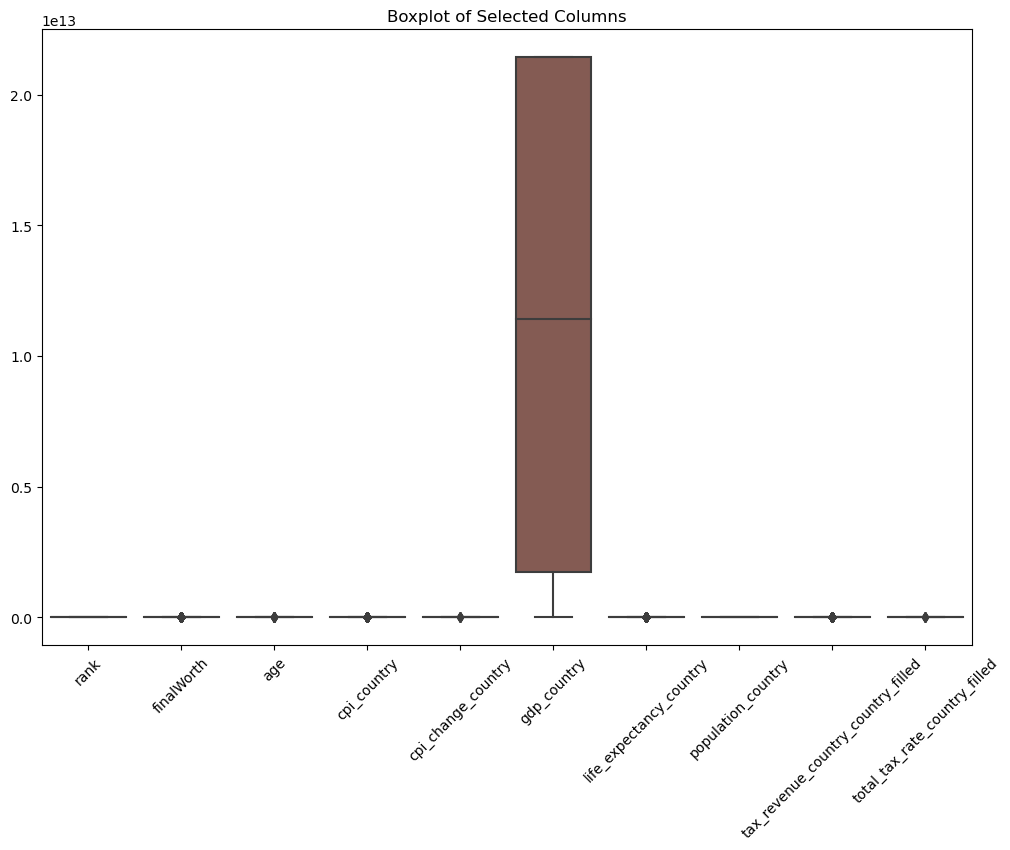

['finalWorth',
 'age',
 'cpi_country',
 'cpi_change_country',
 'life_expectancy_country',
 'tax_revenue_country_country_filled',
 'total_tax_rate_country_filled']

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
selected_columns = data.select_dtypes(include=['int', 'float']).columns


plt.figure(figsize=(12, 8))
sns.boxplot(data=data[selected_columns])
plt.xticks(rotation=45)
plt.title("Boxplot of Selected Columns")
plt.show()


Q1 = data[selected_columns].quantile(0.25)
Q3 = data[selected_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((data[selected_columns] < (Q1 - 1.5 * IQR)) | (data[selected_columns] > (Q3 + 1.5 * IQR))).any(axis=1)
outlier_df = data[outliers]


outlier_df


outlier_columns = data[selected_columns].apply(lambda x: ((x < (Q1[x.name] - 1.5 * IQR[x.name])) | (x > (Q3[x.name] + 1.5 * IQR[x.name]))).any(), axis=0)


outlier_columns_list = outlier_columns[outlier_columns].index.tolist()
outlier_columns_list


In [44]:
# Identifying numerical columns
numerical_columns = data.select_dtypes(include=['number']).columns

# Initialize a mask for rows to keep (initially set to True for all rows)
mask = pd.Series([True] * len(data))

# Mark rows with outliers in any numerical column
for col in numerical_columns:
    Q1 = data[col].quantile(0.20)
    Q3 = data[col].quantile(0.85)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Update the mask
    mask &= (data[col] >= lower_bound) & (data[col] <= upper_bound)

# Apply the mask to remove outliers
cleaned_df = data[mask]

# Displaying the shape of the original and cleaned dataframes
original_shape = data.shape
cleaned_shape = cleaned_df.shape

original_shape,cleaned_shape

((2640, 19), (2177, 19))

In [45]:
cleaned_df

,rank,finalWorth,personName,age,source,industries,organization,selfMade,status,gender,title,cpi_country,cpi_change_country,gdp_country,life_expectancy_country,population_country,country_filled,tax_revenue_country_country_filled,total_tax_rate_country_filled
127,128,13900,ChenBang,57.0,Hospitals,Healthcare,Unknown,True,U,M,Unknown,125.080000,2.900000,1.991000e+13,77.0,1.397715e+09,China,9.400000,59.200000
128,128,13900,LuiCheWoo,94.0,Casinoshotels,GamblingCasinos,Unknown,True,U,M,Unknown,127.755204,3.623763,1.142597e+13,78.5,5.102053e+08,HongKong,12.579566,43.982544
129,130,13700,JohnFredriksen,78.0,Shipping,Logistics,Unknown,True,U,M,Investor,119.620000,1.700000,2.827113e+12,81.3,6.683440e+07,UnitedKingdom,25.500000,30.600000
130,130,13700,DianeHendricks,76.0,Buildingsupplies,ConstructionEngineering,ABCSupply,True,U,F,Cofounder,117.240000,7.500000,2.142770e+13,78.5,3.282395e+08,UnitedStates,9.600000,36.600000
131,130,13700,JanKoum,47.0,WhatsApp,Technology,WhatsAppInc,True,U,M,CEOcofounder,117.240000,7.500000,2.142770e+13,78.5,3.282395e+08,UnitedStates,9.600000,36.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2540,1000,YuRong,51.0,Healthclinics,Healthcare,Unknown,True,D,M,Unknown,125.080000,2.900000,1.991000e+13,77.0,1.397715e+09,China,9.400000,59.200000
2636,2540,1000,RichardYuenglingJr,80.0,Beer,FoodBeverage,Unknown,False,E,M,Unknown,117.240000,7.500000,2.142770e+13,78.5,3.282395e+08,UnitedStates,9.600000,36.600000
2637,2540,1000,ZhangGongyun,60.0,Tyremanufacturingmachinery,Manufacturing,Unknown,True,R,M,Unknown,125.080000,2.900000,1.991000e+13,77.0,1.397715e+09,China,9.400000,59.200000
2638,2540,1000,ZhangGuipingfamily,71.0,Realestate,RealEstate,Unknown,True,D,M,Unknown,125.080000,2.900000,1.991000e+13,77.0,1.397715e+09,China,9.400000,59.200000


In [46]:
cleaned_df['industries'].value_counts()

FinanceInvestments         323
Technology                 283
Manufacturing              267
FashionRetail              222
FoodBeverage               176
RealEstate                 172
Healthcare                 160
Diversified                118
MediaEntertainment          82
Energy                      77
Automotive                  51
Service                     49
MetalsMining                42
Sports                      39
ConstructionEngineering     35
Logistics                   33
GamblingCasinos             24
Telecom                     24
Name: industries, dtype: int64

In [47]:
cleaned_df.to_csv("Billionaires Statistics_Prepared.csv")

In [48]:
df3 = cleaned_df.copy()

In [49]:
#Converting text to float with label encoder

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for column in df3.select_dtypes(include=['object', 'category']).columns:
    df3[column] = label_encoder.fit_transform(df3[column].astype(str))

df3.head()

,rank,finalWorth,personName,age,source,industries,organization,selfMade,status,gender,title,cpi_country,cpi_change_country,gdp_country,life_expectancy_country,population_country,country_filled,tax_revenue_country_country_filled,total_tax_rate_country_filled
127,128,13900,253,57.0,339,8,232,True,5,1,77,125.080000,2.900000,1.991000e+13,77.0,1.397715e+09,13,9.400000,59.200000
128,128,13900,1189,94.0,102,7,232,True,5,1,77,127.755204,3.623763,1.142597e+13,78.5,5.102053e+08,24,12.579566,43.982544
129,130,13700,890,78.0,629,9,232,True,5,1,62,119.620000,1.700000,2.827113e+12,81.3,6.683440e+07,60,25.500000,30.600000
130,130,13700,404,76.0,85,1,0,True,5,0,31,117.240000,7.500000,2.142770e+13,78.5,3.282395e+08,61,9.600000,36.600000
131,130,13700,785,47.0,770,16,238,True,5,1,9,117.240000,7.500000,2.142770e+13,78.5,3.282395e+08,61,9.600000,36.600000


In [50]:
del df3['personName'] #unique identifier 

# SAMPLING DATA

In [51]:
#Systematic Sampling 

# sampling range
k = 5

# select random starting point
start = np.random.randint(0, k)

# receive kth data using iloc indexer.
systematic_sampling = df3.iloc[start::k]

print("Systematic Sampling Table:")
print(systematic_sampling.head())  
print("\nSampling Size:", systematic_sampling.shape)  # Row and column 
systematic_sampling['industries']

Systematic Sampling Table:
     rank  finalWorth   age  source  industries  organization  selfMade  \
129   130       13700  78.0     629           9           232      True   
134   133       13300  71.0     577          13           232      True   
140   141       12300  57.0     218           3           232      True   
145   146       11800  99.0     519           2           232      True   
150   151       11400  59.0       5           6           232      True   

     status  gender  title  cpi_country  cpi_change_country   gdp_country  \
129       5       1     62   119.620000            1.700000  2.827113e+12   
134       0       1     77   127.755204            3.623763  1.142597e+13   
140       5       1     77   113.270000            0.700000  5.436500e+11   
145       5       1     77   127.755204            3.623763  1.142597e+13   
150       0       1     77   125.080000            2.900000  1.991000e+13   

     life_expectancy_country  population_country  country_f

129      9
134     13
140      3
145      2
150      6
        ..
2612    11
2619    10
2625     0
2630    10
2635     8
Name: industries, Length: 435, dtype: int32

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score 
y_ = systematic_sampling['industries']  
x_ = systematic_sampling.drop(['industries'], axis=1)  
x_train,x_test,y_train,y_test = train_test_split(x_,y_, test_size=0.2 , random_state=42)

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro',zero_division=1)
precision = precision_score(y_test, y_pred, average='macro',zero_division=1)
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')

Accuracy: 0.4367816091954023
Recall: 0.31817256817256817
Precision: 0.4390432098765432
F1 Score: 0.223768115942029


In [53]:
#Random Sampling

sample_size = int(len(df3) * 0.2)
random_sample = df3.sample(n=sample_size)

print("Random Sampling Table:")
print(random_sample.head())  
print("\nSample Size:", random_sample.shape) 
random_sample['industries']

Random Sampling Table:
      rank  finalWorth   age  source  industries  organization  selfMade  \
2403  2259        1200  63.0     147           1           232      True   
567    567        4800  50.0     691           4           232      True   
910    905        3200  69.0     243           4           232      True   
2582  2540        1000  56.0     305           4           232     False   
2333  2259        1200  82.0     394           0           232      True   

      status  gender  title  cpi_country  cpi_change_country   gdp_country  \
2403       0       1     77   125.080000            2.900000  1.991000e+13   
567        5       1     77   114.110000            2.200000  5.921644e+11   
910        5       1     77   110.620000            0.600000  2.001244e+12   
2582       0       1     77   120.270000            2.200000  4.033364e+11   
2333       1       1     77   127.755204            3.623763  5.140000e+01   

      life_expectancy_country  population_country  

2403    1
567     4
910     4
2582    4
2333    0
       ..
1608    5
2626    9
1221    2
560     6
1983    0
Name: industries, Length: 435, dtype: int32

In [54]:
#Decision Tree Classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score 
y2 = random_sample['industries']
x2 = random_sample.drop(['industries'], axis = 1)
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2, test_size=0.2 , random_state=42)
model = DecisionTreeClassifier()
model.fit(x2_train, y2_train)

y2_pred = model.predict(x2_test)
accuracy = accuracy_score(y2_test, y2_pred)
recall = recall_score(y2_test, y2_pred, average='macro',zero_division=1)
precision = precision_score(y2_test, y2_pred, average='macro',zero_division=1)
f1 = f1_score(y2_test, y2_pred, average='macro')

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')

Accuracy: 0.4482758620689655
Recall: 0.348005698005698
Precision: 0.39753086419753086
F1 Score: 0.28044716957760435


In [55]:
#Random Forest Classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score 
y2 = random_sample['industries']
x2 = random_sample.drop(['industries'], axis = 1)
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2, test_size=0.2 , random_state=42)
model = RandomForestClassifier(random_state = 42)
model.fit(x2_train, y2_train)

y2_pred = model.predict(x2_test)
accuracy = accuracy_score(y2_test, y2_pred)
recall = recall_score(y2_test, y2_pred, average='macro',zero_division=1)
precision = precision_score(y2_test, y2_pred, average='macro',zero_division=1)
f1 = f1_score(y2_test, y2_pred, average='macro')

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')

Accuracy: 0.3563218390804598
Recall: 0.2594729344729345
Precision: 0.37001424501424496
F1 Score: 0.1836061923781222


In [56]:
#Stratified Sampling
from sklearn.model_selection import train_test_split       

stratification_var = 'industries'
sampleSize = 0.2
df_sample, df_rest = train_test_split(df3, test_size = 1-sampleSize, stratify=df3[stratification_var], random_state=42)

len(df3), len(df_sample), len(df_rest)

(2177, 435, 1742)

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_sample = df_sample.drop(stratification_var, axis=1)
y_sample = df_sample[stratification_var]


X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, stratify=y_sample, random_state=42)


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Model Accuracy: {accuracy}")
reports = classification_report(y_test,y_pred,zero_division=1)
print(reports)

Random Forest Model Accuracy: 0.3103448275862069
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         5
           3       0.67      0.67      0.67         3
           4       0.20      0.22      0.21         9
           5       0.35      0.54      0.42        13
           6       0.25      0.14      0.18         7
           7       0.00      0.00      0.00         1
           8       0.17      0.17      0.17         6
           9       1.00      0.00      0.00         1
          10       0.25      0.18      0.21        11
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         2
          13       0.67      0.86      0.75         7
          14       0.33      0.50      0.40         2
          15       0.00      0.00      0.00         2
          16       0.33      0.3

In [58]:
#Progressive Sampling

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score


X = df3.drop('industries', axis=1)
y = df3['industries']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define sample sizes to test
sample_sizes = np.linspace(0.1, 0.8, 10)

# Dictionary to store the accuracy for each sample size
accuracies = {}
recalls = {}
for size in sample_sizes:
    # Sample the data
    X_sample, _, y_sample, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
    
    # Train the model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_sample, y_sample)
    
    # Make predictions and calculate accuracy
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    recall = recall_score(y_test, predictions, average='macro')
    
    # Store the accuracy
    accuracies[size] = accuracy
    recalls[size] = recall
    print("recall:",recall)


recall: 0.20141977868719338
recall: 0.2164791102098255
recall: 0.24692501734928105
recall: 0.2628689996478683
recall: 0.2797584333488962
recall: 0.28106257740666346
recall: 0.27284845524326595
recall: 0.3264077394909559
recall: 0.31455783952511396
recall: 0.31168712060367043


In [59]:
#Cluster Sampling

clusters = df3['industries'].unique()

sample_size = int(len(clusters) * 0.2)
selected_clusters = np.random.choice(clusters, sample_size, replace=False)

sampled_df = df3[df3['industries'].isin(selected_clusters)]

sampled_df

,rank,finalWorth,age,source,industries,organization,selfMade,status,gender,title,cpi_country,cpi_change_country,gdp_country,life_expectancy_country,population_country,country_filled,tax_revenue_country_country_filled,total_tax_rate_country_filled
128,128,13900,94.0,102,7,232,True,5,1,77,127.755204,3.623763,1.142597e+13,78.5,5.102053e+08,24,12.579566,43.982544
141,142,12200,50.0,126,12,232,True,0,1,77,125.080000,2.900000,1.991000e+13,77.0,1.397715e+09,13,9.400000,59.200000
145,146,11800,99.0,519,2,232,True,5,1,77,127.755204,3.623763,1.142597e+13,78.5,5.102053e+08,24,12.579566,43.982544
179,179,10100,81.0,48,2,232,False,0,1,77,121.460000,0.700000,3.647015e+11,76.0,3.244738e+07,36,12.000000,38.700000
183,184,9800,74.0,364,2,232,True,4,1,77,114.520000,-1.900000,4.211423e+11,77.8,9.770529e+06,59,0.100000,15.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2405,1100,35.0,10,2,232,False,0,1,77,125.080000,2.900000,1.991000e+13,77.0,1.397715e+09,13,9.400000,59.200000
2532,2405,1100,40.0,15,12,232,False,0,1,77,125.080000,2.900000,1.991000e+13,77.0,1.397715e+09,13,9.400000,59.200000
2546,2540,1000,98.0,446,2,232,False,0,0,77,129.780000,2.100000,2.268481e+11,76.5,3.251045e+07,44,14.300000,36.800000
2548,2540,1000,70.0,510,7,232,False,3,1,77,105.480000,0.500000,5.081770e+12,84.2,1.262266e+08,31,11.900000,46.700000


In [60]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,recall_score
from sklearn.model_selection import train_test_split
y = sampled_df['industries']
x = sampled_df.drop(['industries'],axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2 , random_state=42)
model = RandomForestClassifier(random_state = 42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
print(f"Model Accuracy: {accuracy}")
print(f"Model Recall: {recall}")

Model Accuracy: 0.6216216216216216
Model Recall: 0.5425084175084175


In [61]:
#Weighted Sampling 

weights = df3['industries'] / df3['industries'].sum()
sampled_data = df3.sample(n=435, weights=weights)
sampled_data

,rank,finalWorth,age,source,industries,organization,selfMade,status,gender,title,cpi_country,cpi_change_country,gdp_country,life_expectancy_country,population_country,country_filled,tax_revenue_country_country_filled,total_tax_rate_country_filled
2461,2405,1100,57.0,352,5,232,False,1,1,77,119.62,1.7,2.827113e+12,81.3,6.683440e+07,60,25.5,30.6
974,949,3100,79.0,191,2,232,False,0,1,77,151.18,3.0,1.119191e+12,71.5,2.702039e+08,27,10.2,30.1
365,365,6700,56.0,326,5,219,True,0,1,62,119.62,1.7,2.827113e+12,81.3,6.683440e+07,60,25.5,30.6
1427,1368,2200,55.0,5,6,232,True,0,1,77,125.08,2.9,1.991000e+13,77.0,1.397715e+09,13,9.4,59.2
1814,1804,1600,38.0,624,16,232,True,1,1,77,125.08,2.9,1.991000e+13,77.0,1.397715e+09,13,9.4,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,1434,2100,54.0,641,6,232,True,0,1,77,117.24,7.5,2.142770e+13,78.5,3.282395e+08,61,9.6,36.6
2095,2020,1400,35.0,462,4,232,True,0,0,67,117.24,7.5,2.142770e+13,78.5,3.282395e+08,61,9.6,36.6
720,721,3900,76.0,37,10,232,False,0,1,77,112.85,1.4,3.845630e+12,80.9,8.313280e+07,21,11.5,48.8
2604,2540,1000,56.0,24,10,232,False,0,0,77,112.85,1.4,3.845630e+12,80.9,8.313280e+07,21,11.5,48.8


In [62]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, recall_score
from sklearn.model_selection import train_test_split
y = sampled_data['industries']
x = sampled_data.drop(['industries'],axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2 , random_state=42)
model = RandomForestClassifier(random_state = 42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro',zero_division = 1)
print(f"Model Accuracy: {accuracy}")
print(f"Model Recall: {recall}")

Model Accuracy: 0.47126436781609193
Model Recall: 0.27157097288676235


# IMBALANCED DATA and DIMENSIONALITY REDUCTİON

In [63]:
#aggregation
grouped_data = data.groupby('industries')      
total_worth = grouped_data['finalWorth'].sum()
average_age = grouped_data['age'].mean()

count_people = grouped_data.size()

print("Total Worth:\n",total_worth)
print("Average Age:\n",average_age)
print("Number of People:\n",count_people)

Total Worth:
 industries
Automotive                  525300
ConstructionEngineering     118500
Diversified                 905200
Energy                      453500
FashionRetail              1698800
FinanceInvestments         1605100
FoodBeverage                957200
GamblingCasinos             120500
Healthcare                  643200
Logistics                   239500
Manufacturing              1019000
MediaEntertainment          427500
MetalsMining                446800
RealEstate                  657400
Service                     173400
Sports                      134500
Technology                 1877900
Telecom                     203500
Name: finalWorth, dtype: int64
Average Age:
 industries
Automotive                 66.125208
ConstructionEngineering    64.603115
Diversified                68.608027
Energy                     67.744206
FashionRetail              66.740531
FinanceInvestments         65.463069
FoodBeverage               66.563878
GamblingCasinos            68.

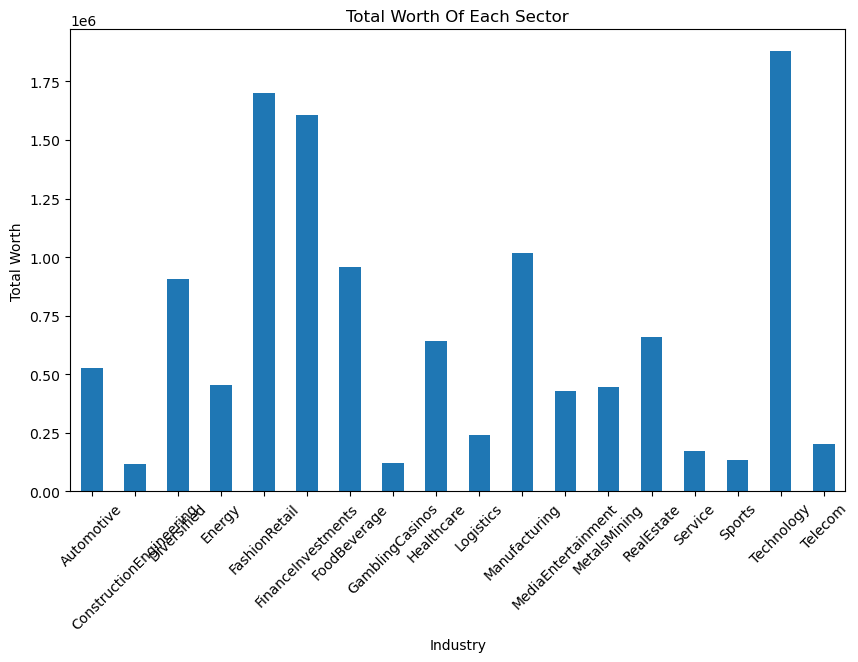

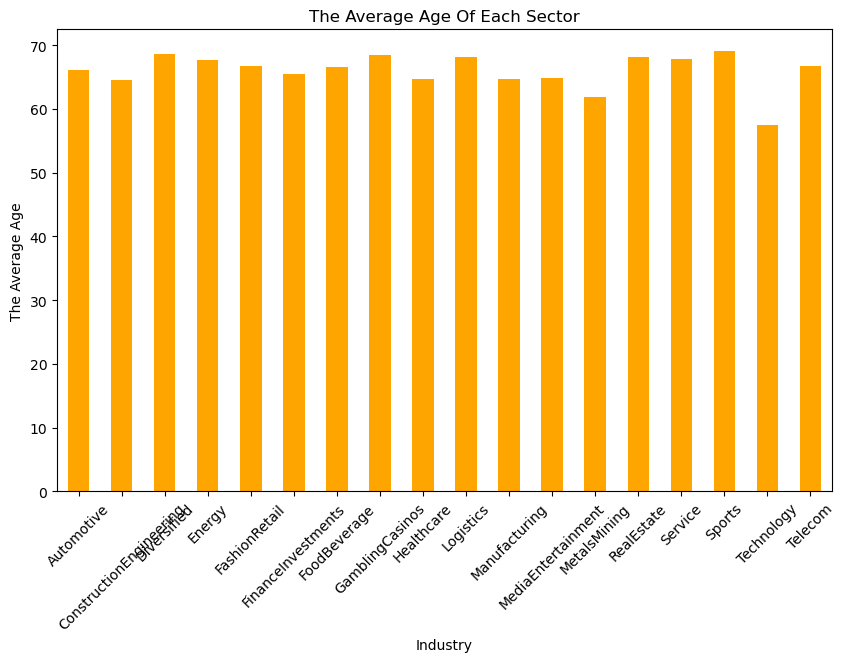

In [64]:
plt.figure(figsize=(10, 6))
total_worth.plot(kind='bar')
plt.title('Total Worth Of Each Sector')
plt.ylabel('Total Worth')
plt.xlabel('Industry')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
average_age.plot(kind='bar', color='orange')
plt.title('The Average Age Of Each Sector')
plt.ylabel('The Average Age')
plt.xlabel('Industry')
plt.xticks(rotation=45)
plt.show()

In [65]:
class_frequency = cleaned_df['industries'].value_counts()
print(class_frequency)

FinanceInvestments         323
Technology                 283
Manufacturing              267
FashionRetail              222
FoodBeverage               176
RealEstate                 172
Healthcare                 160
Diversified                118
MediaEntertainment          82
Energy                      77
Automotive                  51
Service                     49
MetalsMining                42
Sports                      39
ConstructionEngineering     35
Logistics                   33
GamblingCasinos             24
Telecom                     24
Name: industries, dtype: int64


In [66]:
least_represented= class_frequency.min()
most_represented = class_frequency.max()

imbalance_rate = least_represented / most_represented
print(f"Imbalance Rate: {imbalance_rate}")

Imbalance Rate: 0.07430340557275542


In [67]:
#Kaggle
val1=data.industries.value_counts()
val1.mean()

146.66666666666666

In [68]:
val1.count()

18

Text(0.5, 1.0, 'Industry Frequency')

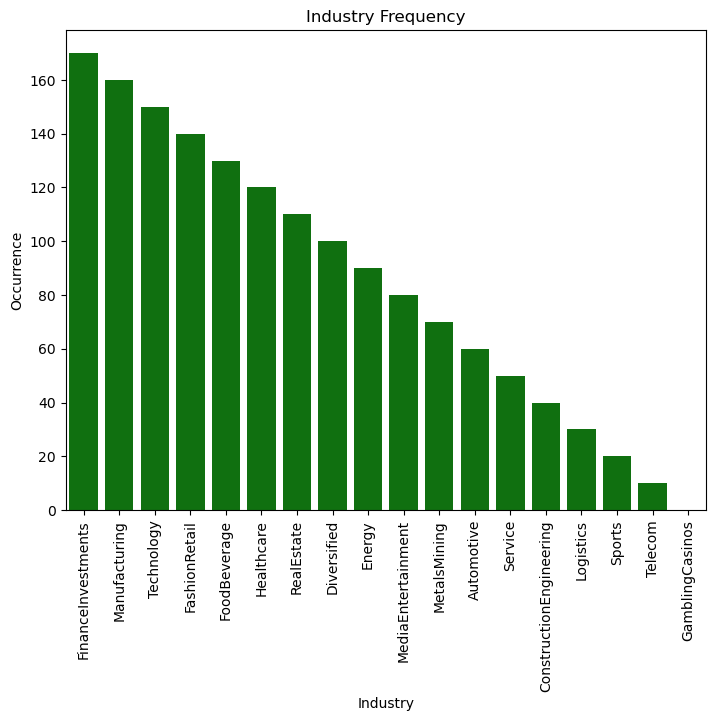

In [69]:
import matplotlib.pyplot as plt
import seaborn as sb
fig1=plt.figure()
axe=fig1.add_axes([1,1,1,1])
sb.barplot(x=val1,y=[i for i in range(0,180,10)],ax=axe,color="green")
axe.set_xticks(range(len(val1)),val1.index,rotation=90)
axe.set_xlabel("Industry")
axe.set_ylabel("Occurrence")
axe.set_title("Industry Frequency")
#Kaggle

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
y = df3['industries']                                                   #balanced class weight (decision tree)
X = df3.drop(['industries'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state=42,class_weight='balanced')
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
scores = cross_val_score(model, X, y, cv=5)
print(f"Model Accuracy: {accuracy}")
recall = recall_score(Y_test, Y_pred, average='macro')  
print(f"Model Recall: {recall}")

print(classification_report(Y_test, Y_pred))

print("Cross Validation Scores:", scores)
print("Average Score:", scores.mean())

Model Accuracy: 0.6077981651376146
Model Recall: 0.5570517541520347
              precision    recall  f1-score   support

           0       0.62      0.50      0.56        10
           1       0.75      0.60      0.67        10
           2       0.44      0.55      0.49        20
           3       0.78      0.50      0.61        14
           4       0.70      0.65      0.67        46
           5       0.75      0.69      0.72        77
           6       0.47      0.68      0.56        25
           7       0.50      0.50      0.50         4
           8       0.82      0.78      0.80        36
           9       1.00      0.60      0.75         5
          10       0.57      0.56      0.56        52
          11       0.53      0.44      0.48        18
          12       0.24      0.44      0.31         9
          13       0.92      0.74      0.82        31
          14       0.12      0.08      0.10        12
          15       0.33      0.38      0.35         8
          16 

In [71]:
!pip install imbalanced-learn

In [72]:
from imblearn.under_sampling import RandomUnderSampler         #RandomUnderSampling (Downsampling)
from sklearn.preprocessing import LabelEncoder

x3 = df3.drop('industries', axis=1)
y3 = df3['industries']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y3)
rus = RandomUnderSampler(random_state=42)
x_resampled, y_resampled = rus.fit_resample(x3, y_encoded)
for column in x_resampled.select_dtypes(include=['object', 'category']).columns:
    x_resampled[column] = label_encoder.fit_transform(x_resampled[column].astype(str))

print("Size of the Original Dataset:", df3.shape)
print("Size of the Resampled Dataset:", x_resampled.shape)


Size of the Original Dataset: (2177, 18)
Size of the Resampled Dataset: (432, 17)


In [73]:
#CHİ2 in Downsampling (Feature Selection)
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import recall_score




# Train and test 
X_train, X_test, Y_train, Y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)
scaler = MinMaxScaler() 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Feature Selection
# select k best using chi2
k = 10
chi2_selector = SelectKBest(chi2, k=k)
X_train_kbest = chi2_selector.fit_transform(X_train_scaled, Y_train)
X_test_kbest = chi2_selector.transform(X_test_scaled)

# Train model
model = DecisionTreeClassifier()
model.fit(X_train_kbest, Y_train)


selected_features_bool = chi2_selector.get_support()
selected_features = X.columns[selected_features_bool]

print(selected_features)

# Calculate accurcy and recall
score = model.score(X_test_kbest, Y_test)
print(f'Model Accuracy: {score}')
Y_pred = model.predict(X_test_kbest)
recall = recall_score(Y_test, Y_pred, average='macro')
print(f'Model Recall: {recall}')


Index(['finalWorth', 'source', 'selfMade', 'status', 'cpi_change_country',
       'gdp_country', 'population_country', 'country_filled',
       'tax_revenue_country_country_filled', 'total_tax_rate_country_filled'],
      dtype='object')
Model Accuracy: 0.4482758620689655
Model Recall: 0.4312049062049062


In [74]:
#RFE in Downsampling 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)


model = DecisionTreeClassifier()
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X_train, Y_train)

model.fit(X_train.loc[:, rfe.support_], Y_train)

Y_pred = model.predict(X_test.loc[:, rfe.support_])
accuracy = accuracy_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred, average='macro')
print(f'Model Accuracy: {accuracy}')
print(f'Model Recall: {recall}')

selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)


Model Accuracy: 0.367816091954023
Model Recall: 0.3803631553631554
Selected Features: Index(['rank', 'finalWorth', 'age', 'source', 'selfMade', 'status',
       'cpi_country', 'cpi_change_country',
       'tax_revenue_country_country_filled', 'total_tax_rate_country_filled'],
      dtype='object')


In [75]:
#PCA in Downsampling
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier


scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_resampled)


X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

pca = PCA(n_components=10)  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train_pca, Y_train)

Y_pred = model.predict(X_test_pca)
accuracy = accuracy_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred, average='macro')
print(f'Model Accuracy after PCA: {accuracy}')
print(f'Model Recall after PCA: {recall}')

Model Accuracy after PCA: 0.12643678160919541
Model Recall after PCA: 0.13285233285233286


In [76]:
#DecisionTreeClassifier in Downsampling
X_train, X_test, Y_train, Y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
scores = cross_val_score(model, x_resampled, y_resampled, cv=5)
print(f"Model Accuracy: {accuracy}")
recall = recall_score(Y_test, Y_pred, average='macro',zero_division=1)  # 'binary' ikili sınıflandırma için
print(f"Model Recall: {recall}")

print(classification_report(Y_test, Y_pred,zero_division=1))

print("Cross Validation Scores:", scores)
print("Average Score:", scores.mean())

Model Accuracy: 0.39080459770114945
Model Recall: 0.40774410774410774
              precision    recall  f1-score   support

           0       0.50      0.17      0.25         6
           1       0.50      0.57      0.53         7
           2       0.00      0.00      0.00         5
           3       0.75      0.27      0.40        11
           4       0.20      0.33      0.25         3
           5       0.13      0.67      0.22         3
           6       0.00      0.00      0.00         5
           7       1.00      0.50      0.67         6
           8       0.50      1.00      0.67         2
           9       0.00      0.00      0.00         2
          10       0.25      0.50      0.33         2
          11       0.75      0.50      0.60         6
          12       0.67      0.67      0.67         3
          13       1.00      0.83      0.91         6
          14       0.00      0.00      0.00         4
          15       0.50      0.40      0.44         5
          1

In [77]:
#RandomForestClassifier in Downsampling
X_train, X_test, Y_train, Y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
scores = cross_val_score(model, x_resampled, y_resampled, cv=5)
print(f"Model Accuracy: {accuracy}")
recall = recall_score(Y_test, Y_pred, average='macro',zero_division=1)  # 'binary' ikili sınıflandırma için
print(f"Model Recall: {recall}")

print(classification_report(Y_test, Y_pred,zero_division=1))

print("Cross Validation Scores:", scores)
print("Average Score:", scores.mean())

Model Accuracy: 0.3333333333333333
Model Recall: 0.3307359307359307
              precision    recall  f1-score   support

           0       0.67      0.33      0.44         6
           1       0.40      0.29      0.33         7
           2       0.14      0.20      0.17         5
           3       0.67      0.18      0.29        11
           4       0.00      0.00      0.00         3
           5       0.20      0.33      0.25         3
           6       0.00      0.00      0.00         5
           7       0.60      0.50      0.55         6
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2
          10       0.17      0.50      0.25         2
          11       0.20      0.17      0.18         6
          12       0.33      0.33      0.33         3
          13       0.40      0.33      0.36         6
          14       0.33      0.50      0.40         4
          15       0.50      1.00      0.67         5
          16 

In [78]:
del cleaned_df['personName']

In [79]:
#Synthetic Minority Over-Sampling Technique
from sklearn.preprocessing import LabelEncoder  
from imblearn.over_sampling import SMOTE
categorical_columns = cleaned_df.select_dtypes(include=['object', 'category']).columns
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    cleaned_df[column] = label_encoders[column].fit_transform(cleaned_df[column])
x4 = cleaned_df.drop('industries', axis=1)
y4 = cleaned_df['industries']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x4, y4)
print("Size of the Original Dataset:", cleaned_df.shape)
print("Size of the Resampled Dataset", X_resampled.shape)
print("Resampled Value Counts:\n", y_resampled.value_counts())

Size of the Original Dataset: (2177, 18)
Size of the Resampled Dataset (5814, 17)
Resampled Value Counts:
 8     323
7     323
14    323
11    323
10    323
5     323
4     323
6     323
2     323
12    323
0     323
13    323
3     323
15    323
16    323
1     323
9     323
17    323
Name: industries, dtype: int64


C:\Users\EMREHAN\AppData\Local\Temp\ipykernel_17100\1770511244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[column] = label_encoders[column].fit_transform(cleaned_df[column])


In [80]:
#CHI2 in Upsampling (Feature Selection)
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import recall_score




# Train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
scaler = MinMaxScaler() 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Feature Selection
# select k best using chi2
k = 10
chi2_selector = SelectKBest(chi2, k=k)
X_train_kbest = chi2_selector.fit_transform(X_train_scaled, Y_train)
X_test_kbest = chi2_selector.transform(X_test_scaled)

# Train model
model = DecisionTreeClassifier()
model.fit(X_train_kbest, Y_train)


selected_features_bool = chi2_selector.get_support()
selected_features = X_resampled.columns[selected_features_bool]

print(selected_features)

# Calculate accurcy and recall
score = model.score(X_test_kbest, Y_test)
print(f'Model Accuracy: {score}')
Y_pred = model.predict(X_test_kbest)
recall = recall_score(Y_test, Y_pred, average='macro')
print(f'Model Recall: {recall}')


Index(['source', 'selfMade', 'status', 'gender', 'cpi_change_country',
       'gdp_country', 'population_country', 'country_filled',
       'tax_revenue_country_country_filled', 'total_tax_rate_country_filled'],
      dtype='object')
Model Accuracy: 0.5778159931212382
Model Recall: 0.5753813080393104


In [81]:
#RFE in Upsampling 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


model = DecisionTreeClassifier()
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X_train, Y_train)

model.fit(X_train.loc[:, rfe.support_], Y_train)

Y_pred = model.predict(X_test.loc[:, rfe.support_])
accuracy = accuracy_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred, average='macro')
print(f'Model Accuracy: {accuracy}')
print(f'Model Recall: {recall}')

selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)


Model Accuracy: 0.5907136715391229
Model Recall: 0.591711538486187
Selected Features: Index(['rank', 'finalWorth', 'age', 'source', 'organization', 'status',
       'cpi_change_country', 'gdp_country', 'life_expectancy_country',
       'population_country'],
      dtype='object')


In [82]:
#PCA in Upsampling
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)


X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

pca = PCA(n_components=10)  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train_pca, Y_train)

Y_pred = model.predict(X_test_pca)
accuracy = accuracy_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred, average='macro')
print(f'Model Accuracy after PCA: {accuracy}')
print(f'Model Recall after PCA: {recall}')

Model Accuracy after PCA: 0.49527085124677556
Model Recall after PCA: 0.49332111596684036


In [83]:
#Decision Tree Classifier in Upsampling
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
scores = cross_val_score(model, X_resampled, y_resampled, cv=5)
print(f"Model Accuracy: {accuracy}")
recall = recall_score(Y_test, Y_pred, average='macro')  
print(f"Model Recall: {recall}")

print(classification_report(Y_test, Y_pred))

print("Cross Validation Scores:", scores)
print("Average Score:", scores.mean())

Model Accuracy: 0.5993121238177128
Model Recall: 0.6010503457038465
              precision    recall  f1-score   support

           0       0.73      0.71      0.72        62
           1       0.73      0.72      0.72        71
           2       0.58      0.53      0.55        64
           3       0.53      0.60      0.56        57
           4       0.37      0.40      0.38        60
           5       0.47      0.39      0.43        69
           6       0.42      0.48      0.45        63
           7       0.82      0.87      0.85        69
           8       0.54      0.60      0.57        62
           9       0.66      0.72      0.69        61
          10       0.30      0.25      0.27        72
          11       0.55      0.51      0.53        59
          12       0.65      0.77      0.70        73
          13       0.89      0.81      0.85        58
          14       0.74      0.60      0.66        70
          15       0.58      0.68      0.63        57
          16 

In [84]:
#Random Forest Classifier in Upsampling
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
scores = cross_val_score(model, X_resampled, y_resampled, cv=5)
print(f"Model Accuracy: {accuracy}")
recall = recall_score(Y_test, Y_pred, average='macro')  
print(f"Model Recall: {recall}")

print(classification_report(Y_test, Y_pred))

print("Cross Validation Scores:", scores)
print("Average Score:", scores.mean())

Model Accuracy: 0.7257093723129837
Model Recall: 0.7268322016201362
              precision    recall  f1-score   support

           0       0.78      0.87      0.82        62
           1       0.84      0.92      0.88        71
           2       0.66      0.69      0.67        64
           3       0.67      0.70      0.68        57
           4       0.55      0.53      0.54        60
           5       0.69      0.48      0.56        69
           6       0.63      0.43      0.51        63
           7       0.90      1.00      0.95        69
           8       0.63      0.58      0.61        62
           9       0.83      0.89      0.86        61
          10       0.49      0.50      0.49        72
          11       0.75      0.80      0.77        59
          12       0.76      0.89      0.82        73
          13       0.85      0.90      0.87        58
          14       0.78      0.71      0.75        70
          15       0.70      0.82      0.76        57
          16 

In [85]:
#Ensembling Different Resampling Datasets
import pandas as pd                                                                
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


y = df3['industries']
X = df3.drop(['industries'],axis=1)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)


model1 = DecisionTreeClassifier().fit(X_train_smote, y_train_smote)
model2 = DecisionTreeClassifier().fit(X_train_rus, y_train_rus)


ensemble = VotingClassifier(estimators=[('smote', model1), ('rus', model2)], voting='hard')
ensemble.fit(X_train, y_train)


y_pred = ensemble.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Ensemble Model Accuracy: {accuracy}')

Ensemble Model Accuracy: 0.6146788990825688


In [86]:
from sklearn.ensemble import GradientBoostingClassifier                 #GradientBoosting Modeli 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

gb_clf = GradientBoostingClassifier(random_state=42)


gb_clf.fit(X_train_scaled, y_train)


y_pred_gb = gb_clf.predict(X_test_scaled)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Gradient Boosting Model Accuracy: {accuracy_gb}')
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Model Accuracy: 0.6964746345657782
              precision    recall  f1-score   support

           0       0.71      0.73      0.72        62
           1       0.85      0.79      0.82        71
           2       0.65      0.61      0.63        64
           3       0.56      0.61      0.58        57
           4       0.60      0.57      0.58        60
           5       0.72      0.75      0.74        69
           6       0.70      0.44      0.54        63
           7       0.84      0.93      0.88        69
           8       0.82      0.74      0.78        62
           9       0.62      0.75      0.68        61
          10       0.54      0.57      0.55        72
          11       0.61      0.63      0.62        59
          12       0.75      0.79      0.77        73
          13       0.87      0.81      0.84        58
          14       0.66      0.66      0.66        70
          15       0.58      0.75      0.66        57
          16       0.61     

In [87]:
data

,rank,finalWorth,personName,age,source,industries,organization,selfMade,status,gender,title,cpi_country,cpi_change_country,gdp_country,life_expectancy_country,population_country,country_filled,tax_revenue_country_country_filled,total_tax_rate_country_filled
0,1,211000,BernardArnaultfamily,74.0,LVMH,FashionRetail,LVMHMotHennessyLouisVuitton,False,U,M,ChairmanandCEO,110.05,1.1,2.715518e+12,82.5,6.705989e+07,France,24.2,60.7
1,2,180000,ElonMusk,51.0,TeslaSpaceX,Automotive,Tesla,True,D,M,CEO,117.24,7.5,2.142770e+13,78.5,3.282395e+08,UnitedStates,9.6,36.6
2,3,114000,JeffBezos,59.0,Amazon,Technology,Amazon,True,D,M,ChairmanandFounder,117.24,7.5,2.142770e+13,78.5,3.282395e+08,UnitedStates,9.6,36.6
3,4,107000,LarryEllison,78.0,Oracle,Technology,Oracle,True,U,M,CTOandFounder,117.24,7.5,2.142770e+13,78.5,3.282395e+08,UnitedStates,9.6,36.6
4,5,106000,WarrenBuffett,92.0,BerkshireHathaway,FinanceInvestments,BerkshireHathawayIncClA,True,D,M,CEO,117.24,7.5,2.142770e+13,78.5,3.282395e+08,UnitedStates,9.6,36.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2540,1000,YuRong,51.0,Healthclinics,Healthcare,Unknown,True,D,M,Unknown,125.08,2.9,1.991000e+13,77.0,1.397715e+09,China,9.4,59.2
2636,2540,1000,RichardYuenglingJr,80.0,Beer,FoodBeverage,Unknown,False,E,M,Unknown,117.24,7.5,2.142770e+13,78.5,3.282395e+08,UnitedStates,9.6,36.6
2637,2540,1000,ZhangGongyun,60.0,Tyremanufacturingmachinery,Manufacturing,Unknown,True,R,M,Unknown,125.08,2.9,1.991000e+13,77.0,1.397715e+09,China,9.4,59.2
2638,2540,1000,ZhangGuipingfamily,71.0,Realestate,RealEstate,Unknown,True,D,M,Unknown,125.08,2.9,1.991000e+13,77.0,1.397715e+09,China,9.4,59.2


In [88]:
cleaned_df

,rank,finalWorth,age,source,industries,organization,selfMade,status,gender,title,cpi_country,cpi_change_country,gdp_country,life_expectancy_country,population_country,country_filled,tax_revenue_country_country_filled,total_tax_rate_country_filled
127,128,13900,57.0,339,8,232,True,5,1,77,125.080000,2.900000,1.991000e+13,77.0,1.397715e+09,13,9.400000,59.200000
128,128,13900,94.0,102,7,232,True,5,1,77,127.755204,3.623763,1.142597e+13,78.5,5.102053e+08,24,12.579566,43.982544
129,130,13700,78.0,629,9,232,True,5,1,62,119.620000,1.700000,2.827113e+12,81.3,6.683440e+07,60,25.500000,30.600000
130,130,13700,76.0,85,1,0,True,5,0,31,117.240000,7.500000,2.142770e+13,78.5,3.282395e+08,61,9.600000,36.600000
131,130,13700,47.0,770,16,238,True,5,1,9,117.240000,7.500000,2.142770e+13,78.5,3.282395e+08,61,9.600000,36.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2540,1000,51.0,320,8,232,True,0,1,77,125.080000,2.900000,1.991000e+13,77.0,1.397715e+09,13,9.400000,59.200000
2636,2540,1000,80.0,61,6,232,False,1,1,77,117.240000,7.500000,2.142770e+13,78.5,3.282395e+08,61,9.600000,36.600000
2637,2540,1000,60.0,736,10,232,True,3,1,77,125.080000,2.900000,1.991000e+13,77.0,1.397715e+09,13,9.400000,59.200000
2638,2540,1000,71.0,577,13,232,True,0,1,77,125.080000,2.900000,1.991000e+13,77.0,1.397715e+09,13,9.400000,59.200000
